In [1]:
import coremltools as  ct
from matplotlib import pyplot as plt

In [2]:
from image_reader import get_img, img2batch

In [11]:
coreml_path = "./weights/iOS/u2net_OfficialSalSeg_quantization.mlmodel"

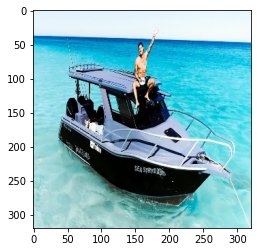

In [12]:
## Get input
demo = get_img(1)
plt.imshow(demo)
x = img2batch(demo)

In [13]:
model = ct.models.MLModel(coreml_path, compute_units=ct.ComputeUnit.CPU_ONLY) 

In [14]:
np_input = x.detach().numpy()
print("Input Shape :", np_input.shape)
predictions = model.predict({'input': np_input})
mask = predictions['output']
print("Output Shape :", mask.shape)

Input Shape : (1, 3, 320, 320)
Output Shape : (1, 1, 320, 320)


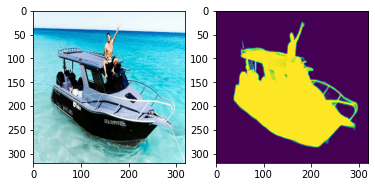

In [15]:
mask_2d = mask.squeeze()
plt.subplot(1,2,1)
plt.imshow(demo)
plt.subplot(1,2,2)
plt.imshow(mask_2d)